

### **What is Lasso Regression?**

Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that performs both **feature selection** and **regularization** to improve prediction accuracy and model interpretability. It is an extension of linear regression where a penalty term is added to the loss function to constrain the magnitude of the coefficients.

The loss function for Lasso Regression is:

$
\text{Minimize: } \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$

Where:
- $ \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 $ is the Mean Squared Error (MSE).
- $ \lambda $ is the regularization parameter (controls the strength of penalty).
- $ \sum_{j=1}^{p} |\beta_j| $ is the **L1 norm** (sum of absolute values of the coefficients).
- $ \beta_j $ are the coefficients of the features.

### **Key Features of Lasso Regression**
1. **Feature Selection:** Lasso can shrink some coefficients to exactly zero, effectively removing less important features from the model.
2. **Regularization:** Prevents overfitting by constraining the size of the coefficients.
3. **Simplicity:** The resulting model is sparse, meaning it uses fewer features, which makes it easier to interpret.

---

### **When is Lasso Regression Used?**
1. **High-Dimensional Data:**
   - When the dataset has a large number of features, Lasso helps identify the most important ones by shrinking others to zero.
   - It is particularly useful when the number of features $(p)$ exceeds the number of observations $(n)$.

2. **Feature Selection:**
   - When you suspect that some features are irrelevant or redundant, Lasso automatically eliminates them during training.

3. **Preventing Overfitting:**
   - By regularizing the coefficients, Lasso prevents models from fitting noise in the data, especially when the dataset is small or noisy.

4. **Interpretability:**
   - When you need a simpler, more interpretable model, Lasso creates a sparse model by retaining only the most relevant features.

---

### **Limitations of Lasso Regression**
1. **Multicollinearity:**
   - When features are highly correlated, Lasso may arbitrarily choose one and shrink the others to zero, which might not be ideal.
   - In such cases, **Elastic Net Regression** (a combination of Lasso and Ridge) might be better.

2. **Small Regularization Parameter $(\lambda)$:**
   - If $\lambda$ is too small, the model behaves like simple linear regression.
   - If $\lambda$ is too large, the model might underfit by shrinking too many coefficients to zero.

---

### **Example Use Case**
Suppose you have a dataset with 1000 features, but you believe only a handful are important for predicting your target variable. Lasso Regression can help:
- Automatically select the most relevant features.
- Reduce the risk of overfitting.
- Create a simpler, more interpretable model.

---
---


### Lasso Regression Formula
$$\text{Minimize: } \frac{1}{2n} \sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2 + \alpha \sum_{j=1}^p |w_j|$$

### Ridge Regression Formula
$$\text{Minimize: } \frac{1}{2n} \sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2 + \alpha \sum_{j=1}^p w_j^2$$


In **Scikit-Learn**, the **Lasso regression** formula uses **α (alpha) instead of λ (lambda)**, and the relation is:

$
\alpha = \frac{\lambda}{n}
$

where **n** is the number of training samples.

### **Reason for λ / n in Scikit-Learn**
This scaling ensures that the regularization effect remains **consistent** regardless of the dataset size. If we used λ directly, larger datasets would experience **stronger** regularization since the sum of squared errors grows with more samples. By dividing λ by **n**, the penalty term is normalized relative to the number of samples.

### **Comparison of Formulas**
#### **Standard Lasso (Mathematical Form, Uses λ)**
$
\min_{\beta} \sum_{i=1}^{n} (y_i - X_i \beta)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$

#### **Scikit-Learn's Lasso (Uses α = λ / n)**
$
\frac{1}{n} \sum_{i=1}^{n} (y_i - X_i \beta)^2 + \alpha \sum_{j=1}^{p} |\beta_j|
$

### **Effect of Using α Instead of λ**
- The **first term** (loss function) is **averaged** over the number of samples.
- The **regularization term** is also scaled accordingly.
- This makes **α independent of dataset size**, making hyperparameter tuning more intuitive.

### **Key Takeaways**
- **λ is used in theoretical Lasso (not normalized by n).**
- **α is used in Scikit-Learn (normalized by n for consistency).**
- **This adjustment helps in practical applications where dataset size varies.**



Let's apply **Lasso Regression** with **α (alpha) tuning** on the **Breast Cancer dataset** to see how it selects important features while predicting whether a tumor is malignant or benign.  

---

## **🔹 Use Case: Breast Cancer Classification with Lasso Regression**
- **Dataset**: Breast Cancer Wisconsin dataset from `sklearn.datasets`.  
- **Objective**: Predict whether a tumor is **malignant (1) or benign (0)** based on multiple features.  
- **Why Lasso?**  
  - Selects the most important features (some coefficients shrink to **zero**).  
  - Prevents overfitting by adding **L1 regularization**.  

---

### **Step-by-Step Implementation**  

#### **1️⃣ Import Libraries & Load Data**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # Target: 1 = Malignant, 0 = Benign

# Split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (Lasso is sensitive to feature scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---

#### **2️⃣ Define α Values & Use GridSearchCV for Best α**

In [19]:
# Define a range of alpha values (logarithmic scale)
alphas = np.logspace(-4, 1, 50)  # 50 values between 0.0001 and 10

# Define a range of alpha values (logarithmic scale)
alphas = np.logspace(-4, 1, 50)  # 50 values between 0.0001 and 10

# Set up Lasso with GridSearchCV
lasso = Lasso(max_iter=10000)
param_grid = {'alpha': alphas}

# Use a regression metric instead of 'accuracy'
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

# Train model
grid_search.fit(X_train, y_train)

# Get the best alpha
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

Best Alpha: 0.0008286427728546842


---

#### **3️⃣ Train Final Lasso Model with Best α**

In [22]:
# Train Lasso with best alpha
best_lasso = Lasso(alpha=best_alpha, max_iter=10000)
best_lasso.fit(X_train, y_train)

# Predict on test set
y_pred = best_lasso.predict(X_test)

# Convert predictions to binary (since Lasso is a regression model)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred_binary)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9649122807017544


---

#### **4️⃣ Analyze Feature Selection Effect**

Selected Features: ['mean texture', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst symmetry', 'worst fractal dimension']


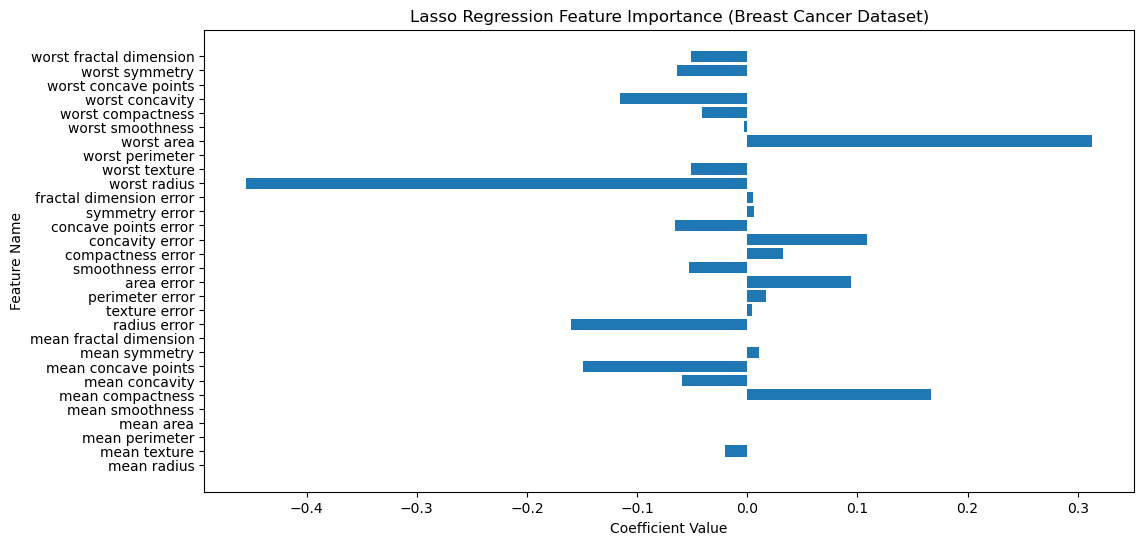

In [25]:
# Get selected features
selected_features = X.columns[best_lasso.coef_ != 0]
print("Selected Features:", selected_features.tolist())

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(X.columns, best_lasso.coef_)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.title("Lasso Regression Feature Importance (Breast Cancer Dataset)")
plt.show()

---

## **🔹 Results & Insights**
1. **Best α is chosen automatically** to balance feature selection and model accuracy.
2. **Lasso drops unimportant features**, helping to reduce noise in the model.
3. **Test accuracy is optimized** while avoiding overfitting.
4. **Feature importance plot** shows which variables are most significant.

---

### **💡 Real-World Applications of Lasso in Medical Data**
- Identifying **key biomarkers** in disease classification.
- Reducing complexity in **genomic datasets** with thousands of features.
- Improving interpretability by keeping **only the most relevant features**.

---
